In [ ]:
# Librerias

import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import FunctionTransformer

In [ ]:
# Funcion para Cargar la imagen
def load_image(image_path):
    """
    # Carga una imagen cuyo path se ingresa por parametro
    # image_path: String
    #            Ruta a la imagen a cargar
    """
    return cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

In [ ]:
# Pre-procesamiento de la imagen:  
def image_processing(img_in, factor = 0.25, show = False): 

    """
    # Prepara una imagen para posteriormente un algoritmo de agrupación lo reciba    
    # Parámetros: 
    # img_in : datatype
    #          La imagen objetivo a procesar
    # factor : float
    #          El factor de reducción al que se desea submuestrear la imagen
    # show   : bool
    #          Activa o desactiva la visualización de la imagen y su versión submuestreada
    """
    # submuestreo para ahorrar recursos computacionales
    nuevo_ancho = int(img_in.shape[1]*factor)
    nuevo_alto = int(img_in.shape[0]*factor)
    nuevo_tamanio = (nuevo_ancho, nuevo_alto)

    img_submuestreada = cv2.resize(img_in, nuevo_tamanio)
    if show:
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.title(f'Imagen Original: {img_in.shape}')
        plt.imshow(img_in)
        plt.axis('off')
        plt.subplot(1, 2, 2)
        plt.title(f'Imagen submuestreada: {img_submuestreada.shape}')
        plt.imshow(img_submuestreada)
        plt.axis('off')
        
    # Darle formato a la imagen
    img_final = img_submuestreada.reshape((-1, 3))/255
    (total_pixels,n) = img_final.shape
    return img_final

In [ ]:
#Se crea el transformador del pre procesamiento de los datos
image_processing_transformer = FunctionTransformer(image_processing)

In [ ]:
# Funcion de busqueda de hiperparamentros
def grid_search(img):

    # Función de Scoring
    def score_fn(modelo, data):
            modelo.fit(data)
            etiquetas = modelo.predict(data)
            return silhouette_score(data, etiquetas) # TODO: Experimentar con otras métricas
    
    KM = KMeans(n_init = 10)
    image_processed = image_processing(img)
    params = {'n_clusters':[5,6,7]}
    kfold = KFold(n_splits = 5, shuffle = True, random_state = 0)
    grid = GridSearchCV(KM, params, cv = kfold, scoring = score_fn, n_jobs = -1)
    grid.fit(image_processed)
    best_k = grid.best_params_
    return best_k['n_clusters']

In [ ]:
#Funcion para obtener la paleta de colores de una imagen especifica
def plotColorPallete(raw_image, pipe, k):
    
    pipe.set_params(model__n_clusters = k)
    pipe.fit(raw_image)
    pipe.predict
    colors = clip(pipe.named_steps['model'].cluster_centers_, 0, 1) #TODO: Al no ser necesariamente los centroides un color existente, pueden dar ligeramente negativos y se daña la visualizacion 

    # Mostrar la imagen original junto con su paleta de colores
    fig, ax = plt.subplots(1,2,figsize=(5, 3))  
    
    ax[0].imshow(raw_image)
    ax[0].set_title('Imagen Original')
    ax[0].axis('off')
    # crear la paleta
    for i, color in enumerate(colors):
        ax[1].bar(i, height=1, color=color, edgecolor='none', width=1)
    
    ax[1].set_title('Paleta de Colores')
    ax[1].axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
def getColorPallete(img_path, pipe):
    raw_image = load_image(img_path)
    best_k = grid_search(raw_image)
    print(f'La ruta de la imagen es :{img_path}')
    print(f'El mejor numero de clusters K es:{best_k}')
    plotColorPallete(raw_image, pipe, best_k)

In [ ]:
#Se crea el pipeline
pipe = Pipeline(steps=[('preprocesing',image_processing_transformer), ('model',KMeans(n_init = 10))])

In [ ]:
getColorPallete('img/img1.jpg', pipe)

In [ ]:
#Se obtiene la paleta para una image diferente
getColorPallete('img/img2.jpg', pipe)

La ruta de la imagen es :img/img3.jpg
El mejor numero de clusters K es:7


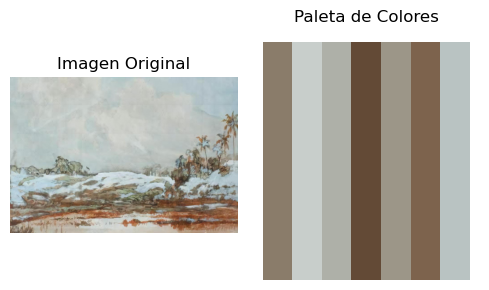

In [120]:
#Se obtiene la paleta para una image diferente
getColorPallete('img/img3.jpg', pipe)

La ruta de la imagen es :img/img4.jpg
El mejor numero de clusters K es:6


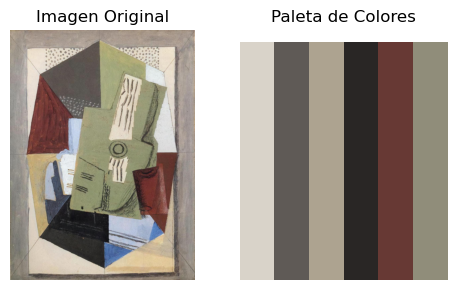

In [121]:
#Se obtiene la paleta para una image diferente
getColorPallete('img/img4.jpg', pipe)